# Анализ рынка заведений общественного питания Москвы

- Вместе с партнерами мы решили открыть небольшое кафе в Москве. Для этого мы решили обратиться к инвесторам. Их интересует, сможет ли наше заведение быть популярным долгое время и стоит ли им вкладывать в наш проект свои деньги. 
- Задача:
  - Для этого мне нужно подготовить анализ рынка заведений общественного питания Москвы.

- У меня есть открытые данные о заведениях общественного питания в Москве.
  - Описание данных:

    - Таблица rest_data:
    - id — идентификатор объекта;
    - object_name — название объекта общественного питания;
    - chain — сетевой ресторан;
    - object_type — тип объекта общественного питания;
    - address — адрес;
    - number — количество посадочных мест.

Рекомендации:
- Вид заведения - Кафе(около 60% рынка)
- Количество посадочных мест - 20-50
- Район расположения - Я рекомендовал бы рассмотреть районы ближе к центру, через которые проходят центральные улицы Москвы.
- Развитие сети возможно либо в близи крупных торговых и бизнес центров или в новых районах москвы где меньше конкуренция.


## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from plotly.subplots import make_subplots
from io import BytesIO
import requests

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
def df_info(data):
    data
    print('Общая информация')
    print('-'*40)
    print(data.info())
    print('-'*40)
    print('Статистика датафрейма')
    print('-'*40)
    print(data.describe())
    print('-'*40)
    print('Наличие дубликатов')
    print(data.duplicated().sum())
    print('-'*40)
    print('Наличие пропусков')
    print('-'*40)
    print(data.isna().sum())

In [4]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
df_info(rest_data)

Общая информация
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None
----------------------------------------
Статистика датафрейма
----------------------------------------
                  id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000
----------------------------------------
Наличие дубликатов
0
----------------------------------------
Наличие пропусков
-----------------

In [6]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data.duplicated(subset=['object_name', 'address']).sum()

225

In [7]:
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address'])

### Комментарий
- Тип данных в каждой колонке — правильный.
- Приведем столбцы к нижнему регистру
- Проверим на дубликаты методом duplicated() способом subset, нашлось 225 дубликатов, возможно из за ошибки в заполнении данных некоторые названия заведени и их адреса продублировались
- Удалим дубликаты методом drop_duplicates()

## Анализ данных

**Проанализируем соотношение видов объектов общественного питания по количеству**

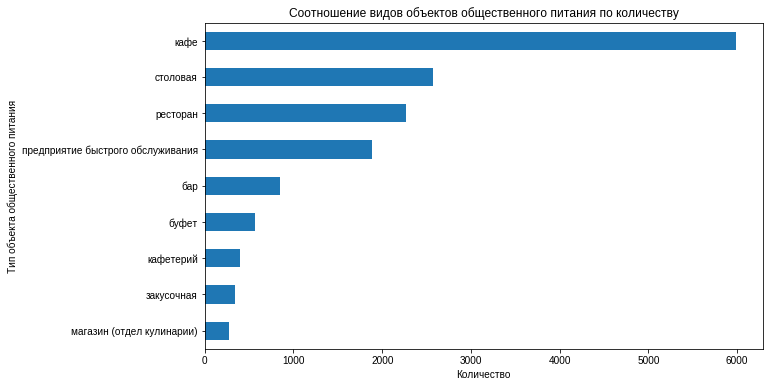

In [8]:
rest_data.groupby('object_type')['id'].count().sort_values().plot(kind='barh',figsize=(10,6))
plt.style.use('seaborn')
plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Количество')
plt.ylabel('Тип объекта общественного питания')
plt.show()

### Комментарий
- На графике видно, что больше всего в Москве кафе,столовых и ресторанов. 

**Проанализируем соотношение сетевых и несетевых заведений по количеству**

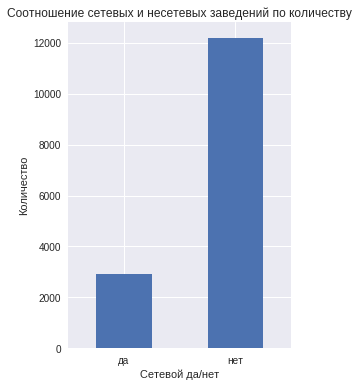

In [9]:
rest_data.groupby('chain')['id'].count().sort_values().plot(kind='bar',figsize=(4,6))
plt.style.use('seaborn')
plt.xticks(rotation='horizontal')
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Сетевой да/нет')
plt.ylabel('Количество')
plt.show()

### Комментарий
- На графику видно, что с большим отрывом преобладают не сетевые заведения.

**Посмотрим для какого вида объекта общественного питания характерно сетевое распространение**

In [10]:
rest_data_pivot = rest_data.pivot_table(index='object_type',columns='chain',values='id',aggfunc='count').reset_index()
rest_data_pivot['share'] = rest_data_pivot['да']/(rest_data_pivot['да'] + rest_data_pivot['нет'])*100

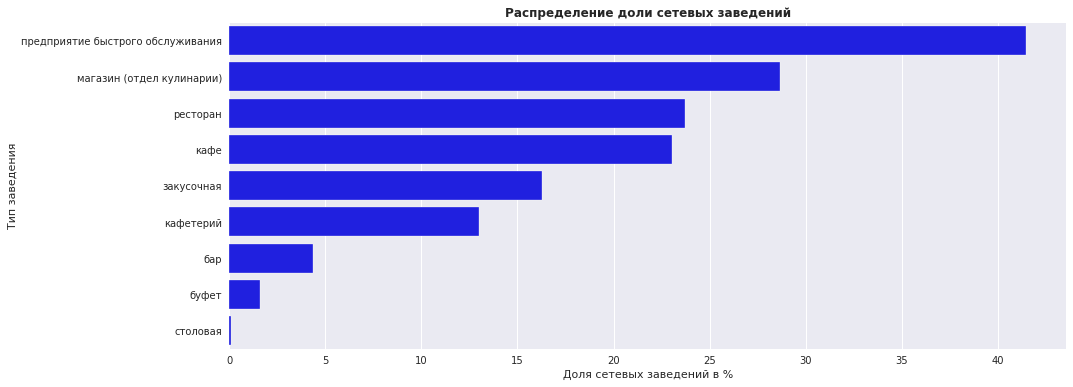

In [11]:
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
barplot = sns.barplot(data=rest_data_pivot.sort_values(by='share',ascending=False), x='share', y='object_type',color='blue')
barplot.set_title('Распределение доли сетевых заведений', fontweight="bold")
barplot.set_xlabel('Доля сетевых заведений в %')
barplot.set_ylabel('Тип заведения')
plt.show()

### Комментарий
- На графике видно, что для предприятий быстрого обслуживания(более 40%) характерно сетевое распространение.

**Проверим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест**

In [12]:
rest_count_seat = rest_data.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'mean'})

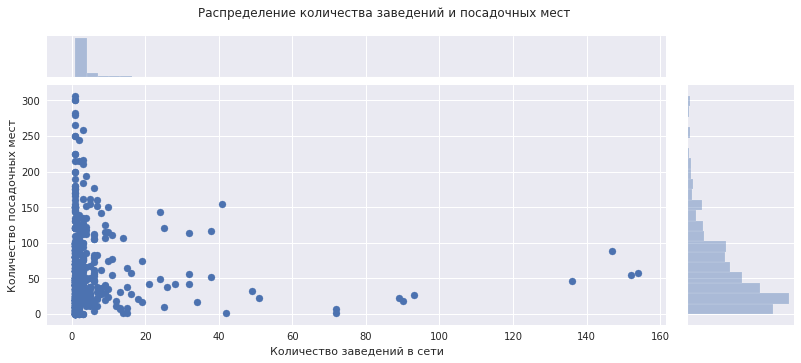

In [13]:
scatter = sns.jointplot(data=rest_count_seat, x='id', y='number')
scatter.fig.set_figwidth(12)
scatter.fig.set_figheight(5)
scatter.fig.suptitle("Распределение количества заведений и посадочных мест")
scatter.fig.subplots_adjust(top=0.90)
scatter.ax_joint.set_ylabel('Количество посадочных мест')
scatter.ax_joint.set_xlabel('Количество заведений в сети')
plt.show()

### Комментарий
- Для сетевых характерно не большое количество заведений(до 10) с небольшим числом посадочных мест(до 50)

**Посмотрим на среднее количество посадочных мест для каждого вида объекта общественного питания**

In [14]:
rest_data_mean = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()

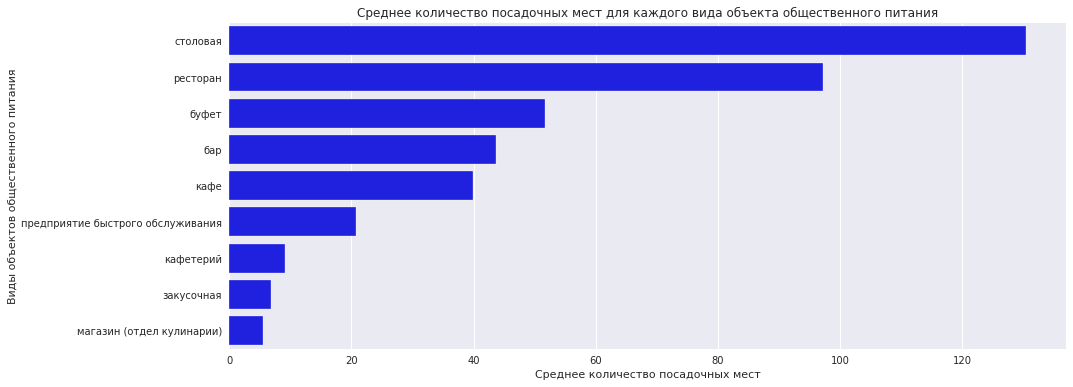

In [15]:
plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
barplot = sns.barplot(data=rest_data_mean, x='number', y='object_type',color='blue')
barplot.set_title('Среднее количество посадочных мест для каждого вида объекта общественного питания')
barplot.set_xlabel('Среднее количество посадочных мест')
barplot.set_ylabel('Виды объектов общественного питания')
plt.show()

### Комментарий
- В среднем наибольшее число посадочных мест в столовых и ресторанах.

**Выделим в отдельный столбец информацию об улице из столбца address**

In [16]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия','квартал']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data["street"] = rest_data["address"].str.extract(str_pat)
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


**Построим график топ-10 улиц по количеству объектов общественного питания**

In [17]:
top_street = rest_data.groupby('street')['id'].count().sort_values(ascending=False).head(10).reset_index()
top_street = top_street.rename(columns={'id':'count_object'})
top_street

,street,count_object
0,проспект Мира,196
1,Профсоюзная улица,179
2,Ленинградский проспект,169
3,Пресненская набережная,165
4,Варшавское шоссе,162
5,Ленинский проспект,147
6,проспект Вернадского,126
7,Кутузовский проспект,112
8,Каширское шоссе,110
9,Кировоградская улица,106


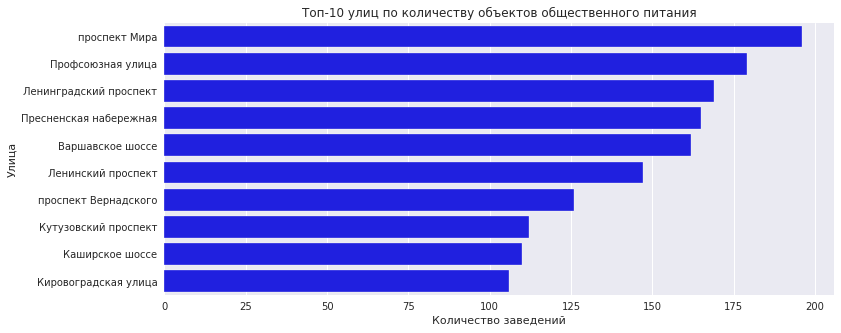

In [18]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
barplot = sns.barplot(data=top_street, x='count_object', y='street',color='blue')
barplot.set_title('Топ-10 улиц по количеству объектов общественного питания')
barplot.set_xlabel('Количество заведений')
barplot.set_ylabel('Улица')
plt.show()

In [19]:
rest_data = rest_data[rest_data['street'].isnull() == False]

### Комментарий
- Выделим в отдельный столбец информацию об улице из столбца address. В отбор не вошли менее 3% адресов в которых не было указано название улиц, отфильтруем их для дальнейшего анализа.
- Построим график топ-10 улиц по количеству объектов общественного питания.
- В лидерах проспект Мира и Профсоюзная улица.

**Воспользуемся источником внешней информацией**

In [20]:
spreadsheet_id = '1ItWcu2lO3aB6InVGRXx-HwSCMcfkeOVtXM6d4KO3iPk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moskow_street = pd.read_csv(BytesIO(r.content))
moskow_street = moskow_street[['streetname', 'area']]
moskow_street = moskow_street.rename(columns={'streetname':'street'})
moskow_street

,street,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район
...,...,...
4393,Вознесенский проезд,Пресненский район
4394,Волков переулок,Пресненский район
4395,Поварская улица,Пресненский район
4396,Кудринская площадь,Пресненский район


### Комментарий
- Для опеределния райнов, в которых находятся улицы, нужно воспользоваться внешней информацией. Из открытых данных воспльзуемся таблицей moskow_street, оставим в ней только столбца с названием улиц и районов.

In [21]:
top_street_area = top_street.merge(moskow_street, how='left', on='street')
top_street_area

,street,count_object,area
0,проспект Мира,196,Алексеевский район
1,проспект Мира,196,Ярославский Район
2,проспект Мира,196,Район Марьина роща
3,проспект Мира,196,Останкинский район
4,проспект Мира,196,Район Ростокино
5,проспект Мира,196,Район Свиблово
6,проспект Мира,196,Мещанский район
7,Профсоюзная улица,179,Академический район
8,Профсоюзная улица,179,Район Черемушки
9,Профсоюзная улица,179,Район Ясенево


### Комментарий
- Топовый улицы по количеству заведений довольно протяженные и охватывают все районы Москва которые можно посмотреть в таблице выше.

**Найдем число улиц с одним объектом общественного питания**

In [22]:
rest_data_one = rest_data.groupby('street')['id'].count().reset_index()
rest_data_one = rest_data_one.rename(columns={'id':'count_object'})
rest_data_one = rest_data_one.query('count_object == 1')
rest_data_one

,street,count_object
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1889,улица Шумилова,1
1890,улица Шумкина,1
1894,улица Щорса,1
1895,улица Энгельса,1


### Комментарий
- Количество улиц с одним заведением 553

In [23]:
rest_data_one = rest_data_one.merge(moskow_street, how='inner', on='street')

In [24]:
rest_data_one = rest_data_one.groupby('area')['street'].count().sort_values(ascending=False).reset_index()
rest_data_one

,area,street
0,Таганский район,27
1,Басманный район,26
2,Район Хамовники,26
3,Тверской район,20
4,Пресненский район,19
...,...,...
95,Район Строгино,1
96,Район Марфино,1
97,Район Марьино,1
98,Район Чертаново Южное,1


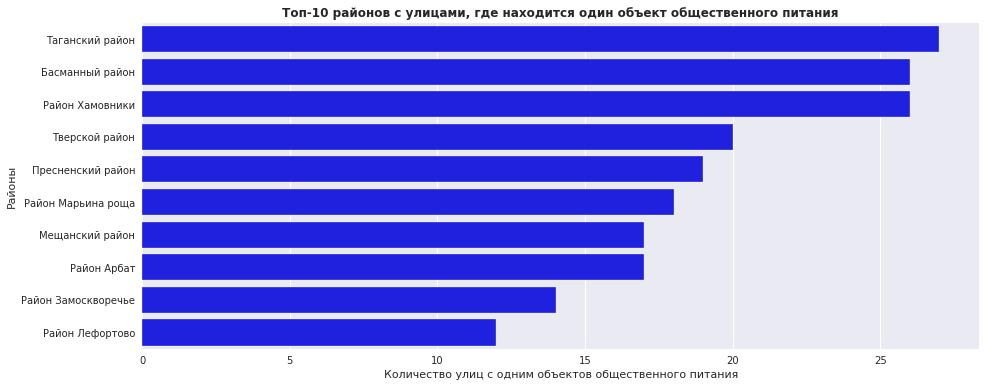

In [25]:
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
barplot = sns.barplot(data=rest_data_one.head(10), x='street', y='area',color='blue')
barplot.set_title('Топ-10 районов с улицами, где находится один объект общественного питания', fontweight="bold")
barplot.set_xlabel('Количество улиц с одним объектов общественного питания')
barplot.set_ylabel('Районы')
plt.show()

### Комментарий
- В лидерах по районам Таганский,Хамовники и Басманный.Предположительно, это короткие переулки или проезды на которых не может поместиться много заведений.

**Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

In [26]:
top_street_number = top_street.merge(rest_data,how='left',on='street')

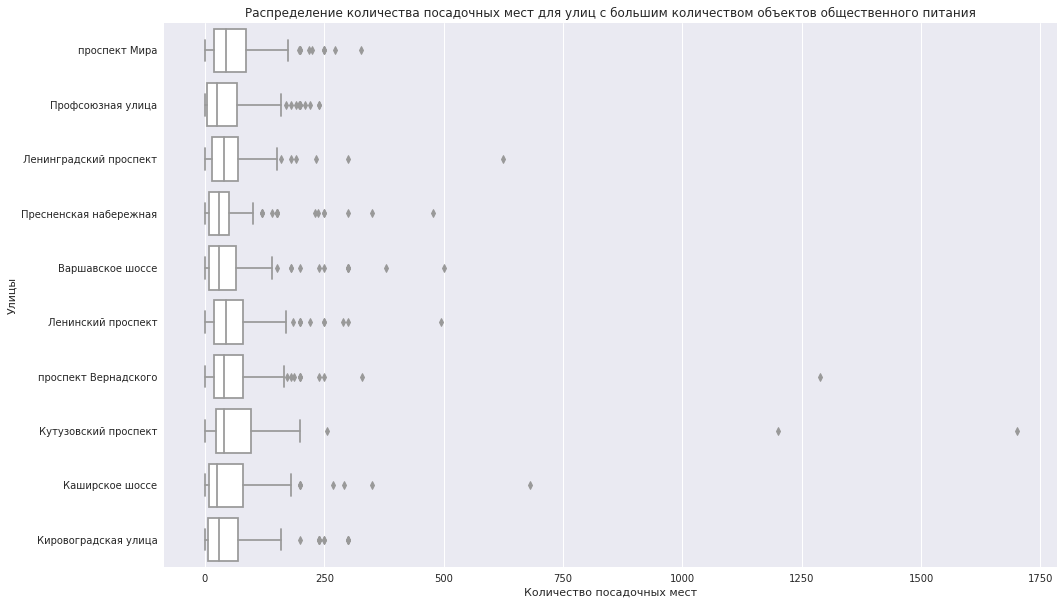

In [27]:
plt.figure(figsize=(16, 10))
sns.set_style("darkgrid")
barplot = sns.boxplot(y='street', x='number',data=top_street_number,color='white')
barplot.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
barplot.set_xlabel('Количество посадочных мест')
barplot.set_ylabel('Улицы')
plt.show()

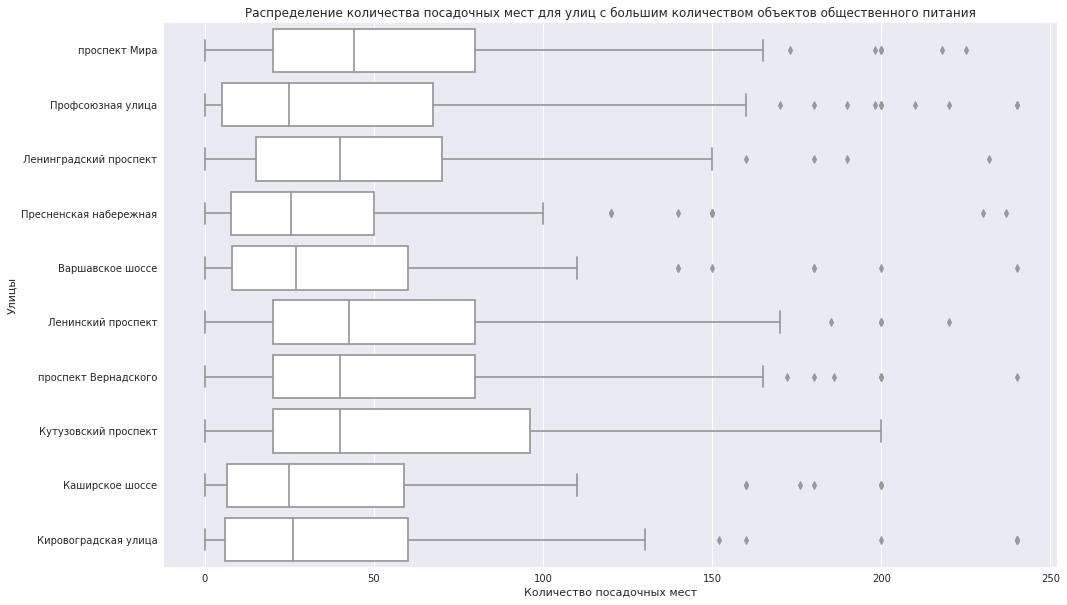

In [28]:
plt.figure(figsize=(16, 10))
sns.set_style("darkgrid")
barplot = sns.boxplot(y='street', x='number',data=top_street_number.query('number<250'),color='white')
barplot.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
barplot.set_xlabel('Количество посадочных мест')
barplot.set_ylabel('Улицы')
plt.show()

### Комментарий
- Количество посадочных мест на улицах с большим количеством объектов общественного питания не превышает 250, в основном распределяется в районе 20-50 посадочных мест.

## Общий вывод
- Вывод:
  - На этапе предабработки данных, нашлись 225 дубликатов, возможно из за ошибки в заполнении данных некоторые названия заведени и их адреса продублировались. 
  - Из типов объектов общественного питания, больше всего в Москве, кафе,столовых и ресторанов.
  - С большим отрывом преобладают не сетевые заведения, около 80%.
  - Для предприятий быстрого обслуживания(более 40%) характерно сетевое распространение.
  - Для сетевых характерно не большое количество заведений(до 10) с небольшим числом посадочных мест(до 50)
  - В среднем наибольшее число посадочных мест в столовых(128) и ресторанах(98)
  - В среднем наибольшеее число посадочных мест в столовых и ресторанах.
  - Улицы, на которых расположено много объектов общественного питания, в основной массе - центральные и довольно протяженные.
  - Топ-10 улиц по количеству объектов общественного питания:
    - проспект Мира(196)	
    - Профсоюзная улица(179)
    - Ленинградский проспект(169)
    - Пресненская набережная(165)
    - Варшавское шоссе(162)
    - Ленинский проспект(147)
    - проспект Вернадского(126)
    - Кутузовский проспект(112)
    - Каширское шоссе(110)
    - Кировоградская улица(106)	
  - Кол-во улиц с одним объектом общественного питания: 553. Основные районы Таганский,Хамовники и Басманный.
- Рекомендации:
  - Вид заведения - Кафе(около 60% рынка)
  - Количество посадочных мест - 20-50
  - Район расположения - Я рекомендовал бы рассмотреть районы ближе к центру, через которые проходят центральные улицы Москвы.
  - Развитие сети возможно либо в близи крупных торговых и бизнес центров или в новых районах москвы где меньше конкуренция.

### Презентация:
https://drive.google.com/file/d/1nstnvAzep6dEUK-bzkO1yU5yvSVqY1c6/view?usp=sharing